# Exploring facets

Facets aggregate collection data in interesting and useful ways, allowing us to build pictures of the collection. This notebook shows you how to get facet data from Trove.

In [2]:
import requests
import altair as alt
import pandas as pd
import os

# Make sure data directory exists
os.makedirs('data', exist_ok=True)

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

Insert your API key between the quotes.

In [11]:
api_key = ''
print('Your API key is: {}'.format(api_key))

Your API key is: 


In [4]:
api_search_url = 'https://api.trove.nla.gov.au/result'

Set up our query parameters. We want everything, so we set the `q` parameter to be a single space.

In [5]:
params = {
    'q': ' ', # A space to search for everything
    'facet': 'format',
    'zone': 'book', 
    'key': api_key,
    'encoding': 'json',
    'n': 1
}

In [ ]:
response = requests.get(api_search_url, params=params)
print(response.url) # This shows us the url that's sent to the API
data = response.json()
# print(data)

In [7]:
from operator import itemgetter

def facet_totals():
    '''
    Loop through facets saving terms and counts.
    Returns a list of dictionaries.
    '''
    facets = []
    # Sort alphabetically by facet name
    facet_list = sorted(data['response']['zone'][0]['facets']['facet']['term'], key=itemgetter('search'))
    for term in facet_list:
        term_count = int(term['count'])
        if 'term' in term:
            # There be sub-terms!
            for subterm in sorted(term['term'], key=itemgetter('search')):
                facets.append({'facet': subterm['search'], 'total': int(subterm['count'])})
                # Subtract the subterm count from the term count
                term_count = term_count - int(subterm['count'])
                # print('{:<50} {:,}'.format(subterm['search'], int(subterm['count'])))
        # print('{:<50} {:,}'.format(term['search'], term_count))
        facets.append({'facet': term['search'], 'total': term_count})
    return pd.DataFrame(facets)

facet_totals = facet_totals()
facet_totals

,facet,total
0,Archived website,21976
1,Audio book,181878
2,Book/Braille,30639
3,Book/Illustrated,8866768
4,Book/Large print,104565
5,Book,9240406
6,Conference Proceedings,576807
7,Microform,702354
8,Thesis,584371


Now we can create a bar chart using Plotly. The `x` values will be the zone names, and the `y` values will be the totals.

In [8]:
# Comment out either or both of these lines if not necessary
# Sort by total (highest to lowest) and take the top twenty
#top_facets = facet_totals.sort_values(by="total", ascending=False)[:20]

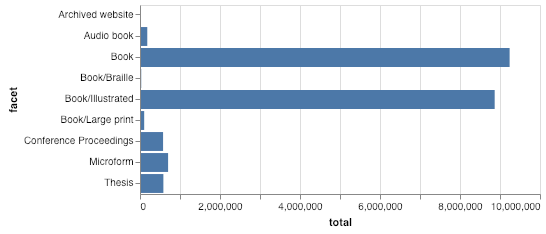

In [9]:
# Create a bar chart
alt.Chart(facet_totals).mark_bar().encode(
    x='total:Q',
    y='facet:N'
)

In [10]:
facet_totals.to_csv('data/facet-{}.csv'.format(params['facet']), index=False)

Once you've saved this file, you can download it from the workbench [data directory](data).